## Gather the data

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_ddg(apo_dg, complex_dg):
    return complex_dg * KT_KCALMOL - apo_dg * KT_KCALMOL

def compute_error(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5 * KT_KCALMOL

### AREX 50 ns

In [3]:
# Retrieve free energies

replicate = 1
main_dir = 47
sub_dirs = list(range(0, 4)) + list(range(5, 12)) + list(range(13, 17)) + list(range(18, 28))

d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
        else:
            length = 10
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results

main_dir = 45
d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in d_mapping.keys():
    d_results[sub_dir] = {}
    if sub_dir == 4:
        replicate = 0
    else:
        replicate = 1
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
        else:
            length = 10
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{d_mapping[sub_dir]}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results
        

In [4]:
# Format the data appropriately for cinnabar

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]

to_plot_arex = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot_arex.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg, dddg*2, 0])
    else:
        to_plot_arex.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg * -1, dddg*2, 0])


### AREST 50 ns

In [5]:
# Retrieve free energies

main_dir_og = 47
main_dir_og2 = 45
main_dir_rest = 52
sub_dirs = list(range(0, 4)) + list(range(5, 12)) + list(range(13, 17)) + list(range(18, 28))

d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
            main_dir = main_dir_rest
            if sub_dir in [19, 21]:
                replicate = 1
            else:
                replicate = 0
        else:
            length = 10
            main_dir = main_dir_og
            replicate = 1
            
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results

d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in d_mapping.keys():
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
            main_dir = main_dir_rest
            sub_dir_final = sub_dir
            replicate = 0
        else:
            length = 10
            main_dir = main_dir_og2
            sub_dir_final = d_mapping[sub_dir]
            if sub_dir_final == 11:
                replicate = 0
            else:
                replicate = 1
        
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir_final}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results
        

In [6]:
# Format the data appropriately for cinnabar

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]

to_plot_arest = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot_arest.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg, dddg*2, 0])
    else:
        to_plot_arest.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg * -1, dddg*2, 0])


In [7]:
to_plot_arest

[['Y29', 'F29', 0.837734436394328, 0.7013987349366633, 0],
 ['Y29', 'A29', 1.8498112959831658, 0.8488566977135539, 0],
 ['W38', 'F38', 0.053753372945006817, 0.9635271417908515, 0],
 ['T42', 'A42', 0.8924352772691933, 0.5153257852601384, 0],
 ['W44', 'F44', 0.42709806720309884, 0.9019485744191662, 0],
 ['E76', 'A76', 0.8007754184594734, 1.4480394737620523, 0],
 ['E80', 'A80', 0.10110859365214786, 1.4577355980951345, 0],
 ['D35', 'A35', 1.176679047197878, 1.1404444826131526, 0],
 ['D39', 'A39', 6.462788148992341, 1.1377245018157507, 0],
 ['K27', 'A27', 2.795742289639051, 1.3687599445871335, 0],
 ['R59', 'A59', 3.75017338663973, 1.5205352417583822, 0],
 ['R83', 'Q83', 1.995752829087074, 1.1595673679114653, 0],
 ['R87', 'A87', 6.997693978380269, 1.1952217637595801, 0],
 ['H102', 'A102', 6.842373553462718, 0.5799253695382593, 0],
 ['-F29', '-Y29', 0.8846591017023435, 0.9471178849218759, 0],
 ['-A29', '-Y29', 1.3333941144661665, 0.8779518390710238, 0],
 ['-F38', '-W38', 0.8126016859941994, 0

## AREST vs AREX correlation plot

In [8]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from cinnabar import plotting, stats, wrangle

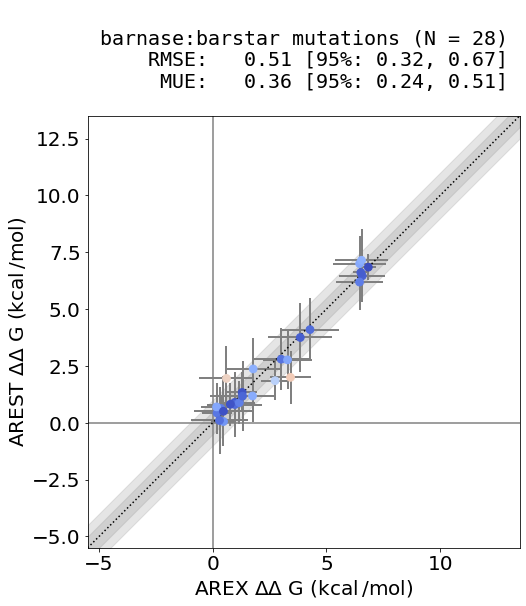

In [9]:
# Format the data appropriately
x = [entry[2] for i, entry in enumerate(to_plot_arex)] # arex
y = [entry[2] for i, entry in enumerate(to_plot_arest)] # arest
xerr =  [entry[3] for i, entry in enumerate(to_plot_arex)] # arex
yerr = [entry[3] for i, entry in enumerate(to_plot_arest)] # arest
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_arest_vs_arex_50ns.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="",
    target_name="barnase:barstar mutations",
    xlabel="AREX",
    ylabel="AREST",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    xy_lim=[-5.5, 13.5],
#     data_labels=labels_internal_consistency,
    font_sizes={"title":20, "labels": 20, "other": 20},
    scatter_kwargs={'s': 60})
